In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Load the data
df = pd.read_csv('house_prices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
# Remove the header row (assuming the data starts from the second row)
df = df.iloc[1:]
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [48]:
# Data exploration and cleaning
print(df.head())  # Check the first few rows
print(df.info())  # Get information about the data

   Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   
5   6          50         RL         85.0    14115      Pave   NaN   

  Property_Shape LandContour Utilities  ... PoolArea PoolQC  Fence  \
1            Reg         Lvl    AllPub  ...        0    NaN    NaN   
2            IR1         Lvl    AllPub  ...        0    NaN    NaN   
3            IR1         Lvl    AllPub  ...        0    NaN    NaN   
4            IR1         Lvl    AllPub  ...        0    NaN    NaN   
5            IR1         Lvl    AllPub  ...        0    NaN  MnPrv   

  MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
1         NaN       0      5   2007        WD         Normal   
2         NaN       0      9  

In [49]:
# Handle missing values (adjust based on your data)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())  # Example: Fill missing LotFrontage with mean

In [50]:
# Remove outliers (adjust based on your data)
q1 = df['Property_Sale_Price'].quantile(0.25)
q3 = df['Property_Sale_Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Property_Sale_Price'] >= lower_bound) & (df['Property_Sale_Price'] <= upper_bound)]

In [51]:
# Drop unnecessary columns (adjust based on your analysis)
df.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

In [52]:
# Encode categorical variables
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df['Condition1'] = le.fit_transform(df['Condition1'])
df['Condition2'] = le.fit_transform(df['Condition2'])
#

In [53]:
# Standardize numerical features
scaler = StandardScaler()
df[['LotFrontage', 'LotArea', 'GrLivArea', 'GarageArea']] = scaler.fit_transform(df[['LotFrontage', 'LotArea', 'GrLivArea', 'GarageArea']])

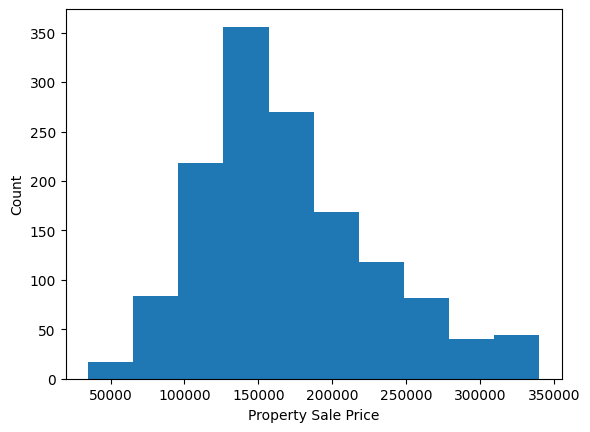

In [54]:
# Visualization
# Histogram for price
plt.hist(df['Property_Sale_Price'])
plt.xlabel('Property Sale Price')
plt.ylabel('Count')
plt.show()

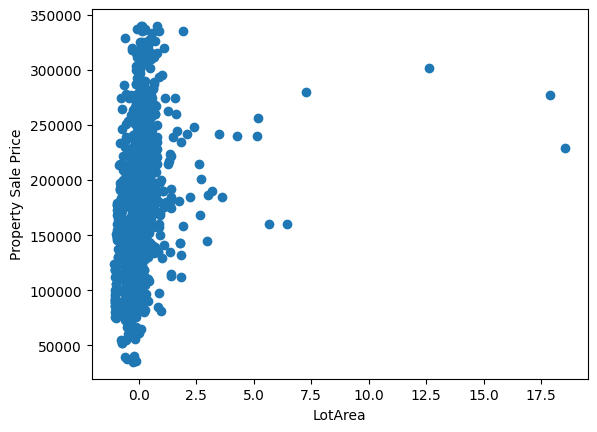

In [55]:
# Scatter plot for LotArea vs. Property_Sale_Price
plt.scatter(df['LotArea'], df['Property_Sale_Price'])
plt.xlabel('LotArea')
plt.ylabel('Property Sale Price')
plt.show()

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you've already loaded and cleaned your data (`df`)

# Check for missing values
print(df.isnull().sum())  # Identify columns with missing values

# Handle missing values (example: impute with mean)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())  # Adjust as needed

# Check data types
print(df.dtypes)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df['Condition1'] = le.fit_transform(df['Condition1'])
df['Condition2'] = le.fit_transform(df['Condition2'])
# ...


Id                        0
Dwell_Type                0
Zone_Class                0
LotFrontage               0
LotArea                   0
Road_Type                 0
Property_Shape            0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
Dwelling_Type             0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType              861
MasVnrArea                7
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 37
BsmtCond                 37
BsmtExposure             38
BsmtFinType1             37
BsmtFinSF1                0
BsmtFinType2             38
BsmtFinSF2          